# <center> 👉 class_13_6 » _CVZone_ </center>


# ▣ CVZone
https://github.com/cvzone/cvzone  

This is a Computer vision package that makes its __easy to run Image processing and AI functions__.  

At the core it uses __OpenCV and Mediapipe libraries__.

In [1]:
pip install cvzone


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 38.1/38.1 MB 1.8 MB/s eta 0:00:00
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26310 sha256=9a368b2c08bd81e0919ee1d0640421101166bdc1b4394177e3da283065e9b7f7
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\fb\28\f6\dfca0db9d9e51cfd2f6b0312c46f96d2945890d72fe689cfc0
Successfully built cvzone


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensor2tensor 1.15.7 requires flask, which is not installed.
tensor2tensor 1.15.7 requires gevent, which is not installed.
tensor2tensor 1.15.7 requires h5py, which is not installed.
tensor2tensor 1.15.7 requires sympy, which is not installed.
magenta 2.1.3 requires imageio, which is not installed.
magenta 2.1.3 requires scikit-image, which is not installed.
magenta 2.1.3 requires tensorflow, which is not installed.


## ▶ Face Mesh 

- Initialize FaceMeshDetector object
>- staticMode: If True, the detection happens only once, else every frame
>- maxFaces: Maximum number of faces to detect
>- minDetectionCon: Minimum detection confidence threshold
>- minTrackCon: Minimum tracking confidence threshold

In [60]:
from cvzone.FaceMeshModule import FaceMeshDetector
import cv2

In [61]:
cap = cv2.VideoCapture(0)
detector = FaceMeshDetector(staticMode=False, maxFaces=2, minDetectionCon=0.5, minTrackCon=0.5)

while True:
    success, img = cap.read()
    img, faces = detector.findFaceMesh(img, draw=True)
    if faces:
        for face in faces:
            # Get specific points for the eye
            leftEyeUpPoint = face[159]  # leftEyeUpPoint: Point above the left eye
            leftEyeDownPoint = face[23] # leftEyeDownPoint: Point below the left eye

            # Calculate the vertical distance between the eye points
            # leftEyeVerticalDistance: Distance between points above and below the left eye
            # info: Additional information (like coordinates)
            leftEyeVerticalDistance, info = detector.findDistance(leftEyeUpPoint, leftEyeDownPoint)

            # Print the vertical distance for debugging or information
            print(leftEyeVerticalDistance)

    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()    

13.038404810405298
12.041594578792296
12.041594578792296
12.0
12.0
13.038404810405298
12.041594578792296
12.041594578792296
12.0
12.0
12.041594578792296
12.0
13.0
12.041594578792296
12.0
12.041594578792296
12.041594578792296
12.0
12.041594578792296
13.0
12.041594578792296
13.038404810405298
12.041594578792296
12.041594578792296
12.041594578792296
12.041594578792296
12.0
12.041594578792296
12.041594578792296
12.0
12.041594578792296
12.0
12.041594578792296
12.041594578792296
12.041594578792296
12.041594578792296
12.041594578792296
12.041594578792296
12.041594578792296
12.041594578792296
12.041594578792296
12.041594578792296
11.045361017187261
11.045361017187261
12.041594578792296
12.041594578792296
11.045361017187261
12.041594578792296
12.041594578792296
11.045361017187261
11.045361017187261
11.045361017187261
12.041594578792296
12.0
12.041594578792296
12.041594578792296
13.038404810405298
12.041594578792296
12.041594578792296
12.0
12.0
12.0
11.0
10.0
11.0
10.04987562112089
11.0
11.04536

11.045361017187261
11.045361017187261
11.180339887498949
10.198039027185569
11.045361017187261
10.04987562112089
10.04987562112089
10.04987562112089
10.04987562112089
10.04987562112089
10.04987562112089
10.04987562112089
11.045361017187261
11.045361017187261
10.0
10.04987562112089
11.045361017187261
11.045361017187261
10.04987562112089
10.198039027185569
10.04987562112089
11.045361017187261
11.045361017187261
11.180339887498949
11.180339887498949
11.180339887498949
11.180339887498949
12.165525060596439
12.041594578792296
12.165525060596439
12.041594578792296
12.165525060596439
11.40175425099138
11.180339887498949
11.180339887498949
11.180339887498949
11.40175425099138
11.180339887498949
10.44030650891055
10.44030650891055
11.40175425099138
11.40175425099138
12.36931687685298
11.40175425099138
10.44030650891055
11.40175425099138
9.219544457292887
11.180339887498949
11.045361017187261
12.165525060596439
11.180339887498949
11.180339887498949
12.041594578792296
11.180339887498949
11.045361

## ▶ Pose Estimation

In [64]:
from cvzone.PoseModule import PoseDetector
import cv2

# cap = cv2.VideoCapture('./Viseos/people_walk.mp4')
# cap = cv2.VideoCapture('./pose_est/pullup-sample.mp4')
cap = cv2.VideoCapture('./pose_est/squat-sample.mp4')

detector = PoseDetector(staticMode=False,
                        modelComplexity=1,
                        smoothLandmarks=True,
                        enableSegmentation=False,
                        smoothSegmentation=True,
                        detectionCon=0.5,
                        trackCon=0.5)

while True:
    success, img = cap.read()
    img = cv2.resize(img, (600, 800))
    img = detector.findPose(img)

    # Find the landmarks, bounding box, and center of the body in the frame
    # Set draw=True to draw the landmarks and bounding box on the image
    lmList, bboxInfo = detector.findPosition(img, draw=True, bboxWithHands=False)

    # Check if any body landmarks are detected
    if lmList:
        # Get the center of the bounding box around the body
        center = bboxInfo["center"]

        # Draw a circle at the center of the bounding box
        cv2.circle(img, center, 5, (255, 0, 255), cv2.FILLED)

        # Calculate the distance between landmarks 11 and 15 and draw it on the image
        length, img, info = detector.findDistance(lmList[11][0:2],
                                                  lmList[15][0:2],
                                                  img=img,
                                                  color=(255, 0, 0),
                                                  scale=10)

        # Calculate the angle between landmarks 11, 13, and 15 and draw it on the image
        angle, img = detector.findAngle(lmList[11][0:2],
                                        lmList[13][0:2],
                                        lmList[15][0:2],
                                        img=img,
                                        color=(0, 0, 255),
                                        scale=10)

        # Check if the angle is close to 50 degrees with an offset of 10
        isCloseAngle50 = detector.angleCheck(myAngle=angle,
                                             targetAngle=50,
                                             offset=10)
        
#         print(isCloseAngle50) # Print the result of the angle check

    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()   

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


## ▶ Selfie Segmentation  

- segmentor = SelfiSegmentation(model=0)  
>- Initialize the SelfiSegmentation class. It will be used for background removal.
>- model is 0 or 1 : 0 is general, 1 is landscape(faster)  

- imgOut = segmentor.removeBG(img, imgBg=(255, 0, 255), cutThreshold=0.1)
>- Use the SelfiSegmentation class to remove the background
>- Replace it with a magenta background (255, 0, 255)
>- imgBg can be a color or an image as well - must be same size as the original
>- cutThreshold is the sensitivity of the segmentation.

- imgStacked = cvzone.stackImages([img, imgOut], cols=2, scale=1)
>- Stack the original image and the image with background removed side by side


In [2]:
# BG img = (255, 0, 255)
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
import cv2

cap = cv2.VideoCapture(0)
cap.set(3, 640)  # Set the frame width
cap.set(4, 480)  # Set the frame height

segmentor = SelfiSegmentation(model=0)

while True:
    success, img = cap.read()
    imgOut = segmentor.removeBG(img, imgBg=(0, 255, 255), cutThreshold=0.1) 
    imgStacked = cvzone.stackImages([img, imgOut], cols=2, scale=1)

    cv2.imshow("Image", imgStacked)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

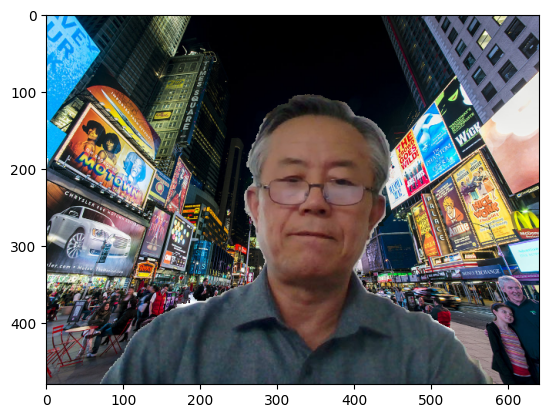

In [3]:
# BG img = times-square.jpg

import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
import cv2
from matplotlib import pyplot as plt


cap = cv2.VideoCapture(0)
cap.set(3, 640)  # Set the frame width
cap.set(4, 480)  # Set the frame height

segmentor = SelfiSegmentation(model=0)
imgBg = cv2.imread('./images/practice_img/times-square.jpg')
# imgBg = cv2.imread('./images/practice_img/manhattan.jpg')
imgBg = cv2.resize(imgBg,(640,480))
# imgBg.shape

while True:
    success, img = cap.read()
#     img = cv2.flip(img,1)
    imgOut = segmentor.removeBG(img, imgBg, cutThreshold=0.1) 
    imgStacked = cvzone.stackImages([img, imgOut], cols=2, scale=1)

    cv2.imshow("Image_out", imgOut)
    cv2.imshow("Image_stack", imgStacked)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(imgOut, cv2.COLOR_BGR2RGB))
plt.show()

In [49]:
cap.release()
cv2.destroyAllWindows()

In [1]:
# BG Video = pedestrian.mp4

import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
import cv2
from matplotlib import pyplot as plt


cap = cv2.VideoCapture(0)
cap.set(3, 640)  # Set the frame width
cap.set(4, 480)  # Set the frame height

segmentor = SelfiSegmentation(model=0)
# cap_bg =cv2.VideoCapture('./Videos/pedestrian.mp4') 
cap_bg =cv2.VideoCapture('./Videos/driving.gif') 

while True:
    success, img = cap.read()
    successbg, imgBg = cap_bg.read()
    imgBg = cv2.resize(imgBg,(640,480))
    imgOut = segmentor.removeBG(img, imgBg, cutThreshold=0.1) 
#     imgStacked = cvzone.stackImages([img, imgOut], cols=2, scale=1)

    cv2.imshow("Vd_out", imgOut)
#     cv2.imshow("Vd_stack", imgStacked)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(imgOut, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [59]:
cap.release()
cv2.destroyAllWindows()